In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.6
config.gpu_options.allow_growth = True
session = InteractiveSession(config = config)

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

training_set = datagen.flow_from_directory("/kaggle/input/cat-and-dog", target_size=(64, 64), batch_size = 32, class_mode="binary")

Found 10028 images belonging to 2 classes.


In [4]:
datagen1 = ImageDataGenerator(rescale = 1./255)

test_set = datagen1.flow_from_directory("/kaggle/input/cat-and-dog", target_size=(64, 64), batch_size = 32, class_mode="binary")

Found 10028 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [6]:
from tensorflow.keras.regularizers import l2

In [7]:
cnn = tf.keras.models.Sequential()

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same", kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

In [9]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=32, padding="same",kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units = 128, activation = 'relu'))

In [13]:
cnn.add(Dense(1, kernel_regularizer = tf.keras.regularizers.l2(0.01), activation
              ='linear'))

In [14]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [15]:
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'] )

In [16]:
r = cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
314/314 [==============================] - 90s 282ms/step - loss: 0.4458 - accuracy: 0.7956 - val_loss: 0.4262 - val_accuracy: 0.7983
Epoch 2/15
314/314 [==============================] - 61s 195ms/step - loss: 0.4173 - accuracy: 0.7983 - val_loss: 0.4106 - val_accuracy: 0.7983
Epoch 3/15
314/314 [==============================] - 81s 258ms/step - loss: 0.4157 - accuracy: 0.7983 - val_loss: 0.4105 - val_accuracy: 0.7983
Epoch 4/15
314/314 [==============================] - 81s 259ms/step - loss: 0.4118 - accuracy: 0.7983 - val_loss: 0.4085 - val_accuracy: 0.7983
Epoch 5/15
314/314 [==============================] - 63s 201ms/step - loss: 0.4099 - accuracy: 0.7983 - val_loss: 0.4078 - val_accuracy: 0.7983
Epoch 6/15
314/314 [==============================] - 81s 260ms/step - loss: 0.4098 - accuracy: 0.7983 - val_loss: 0.4108 - val_accuracy: 0.7983
Epoch 7/15
314/314 [==============================] - 80s 255ms/step - loss: 0.4088 - accuracy: 0.7983 - val_loss: 0.4069 - val_ac

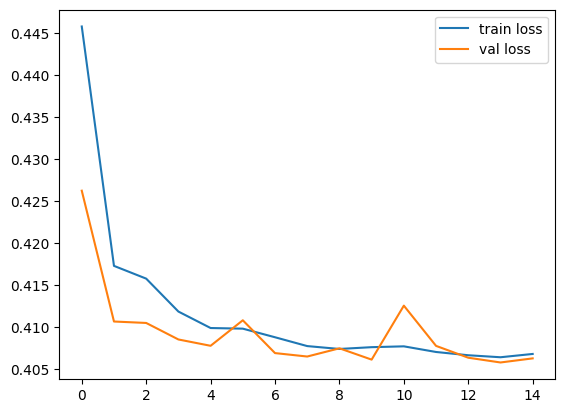

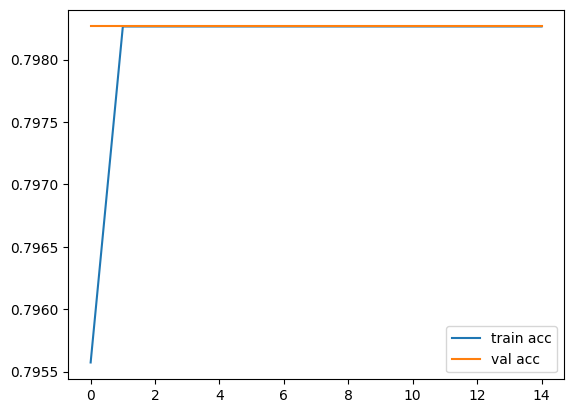

In [17]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()

In [18]:
from tensorflow.keras.models import load_model

cnn.save('./model_rcat_dog.h5')

In [19]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('../input/cat-and-dog/training_set/training_set/dogs/dog.2100.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 118ms/step


In [20]:
if result[0]<0:
    print("The image classified is cat")
else:
    print("The image classified is dog")

The image classified is dog
